In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1차 EDA
1. holiday , workingday 컬럼을 종합해서 day_type 새로운 칼럼 생성. 기존 두 칼럼은 삭제\
2. datetime 자료형인 인덱스에서 hour만 추출해서 칼럼으로 추가\
결과물: `preprocessed_train.csv`

In [3]:
train_data = pd.read_csv('data/train.csv', index_col='datetime')
test_data = pd.read_csv('data/test.csv', index_col='datetime')
train_data.index = pd.to_datetime(train_data.index)
test_data.index = pd.to_datetime(test_data.index)

In [108]:
train_x = train_data.iloc[:,:-3]
train_y = train_data.iloc[:,-1]

In [109]:
train_x.shape, train_y.shape

((10886, 8), (10886,))

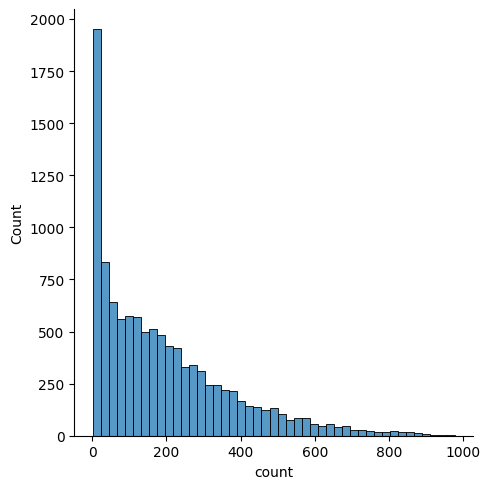

In [110]:
sns.displot(train_y)

In [8]:
grouped_by_day = train_data.groupby(['holiday', 'workingday'])['count'].describe()

In [21]:
grouped_by_day

count        mean         std  min   25%    50%    75%  \
holiday workingday                                                            
0       0           3163.0  188.765096  174.271888  1.0  44.0  128.0  303.5   
        1           7412.0  193.011873  184.513659  1.0  41.0  151.0  277.0   
1       0            311.0  185.877814  168.300531  1.0  38.5  133.0  308.0   

                      max  
holiday workingday         
0       0           783.0  
        1           977.0  
1       0           712.0

<Axes: ylabel='count'>

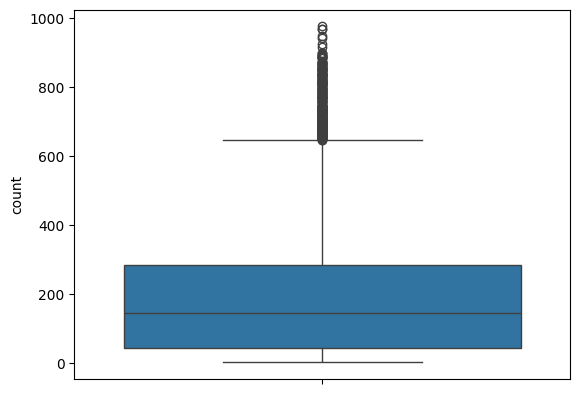

In [12]:
sns.boxplot(train_data['count'])

<Axes: ylabel='count'>

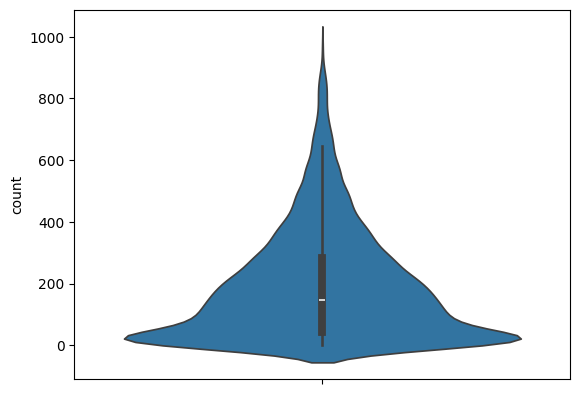

In [13]:
sns.violinplot(train_data['count'])

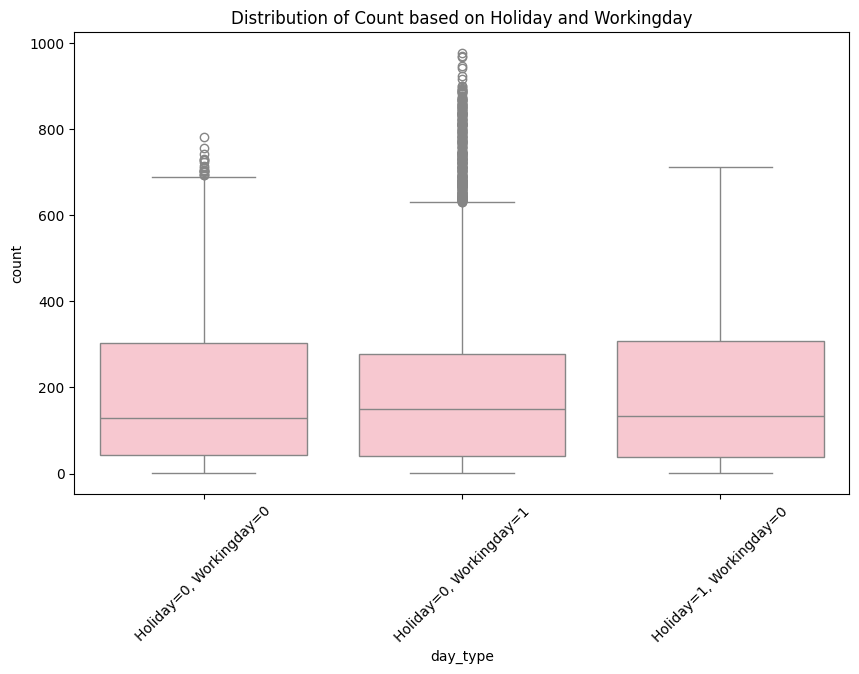

In [15]:
train_data['day_type'] = train_data.apply(lambda row: f"Holiday={row['holiday']}, Workingday={row['workingday']}", axis=1)
plt.figure(figsize=(10,6))
sns.boxplot(x='day_type', y='count', data=train_data, color='pink')
plt.title('Distribution of Count based on Holiday and Workingday')
plt.xticks(rotation=45)
plt.show()

정리

Categorical data : season / holiday / workingday / weather

Numerical data : temp / atemp / humidity / windspeed /

Y : count

In [111]:
def get_daytype(row):
    if row['holiday'] == 0 and row['workingday'] == 1: #workingday
        return 1
    elif row['holiday'] == 0 and row['workingday'] == 0: #weekend
        return 2
    elif row['holiday'] == 1 and row['workingday'] == 0: #holiday
        return 3

In [112]:
train_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [29]:
train_data = train_data.drop(['day_type'], axis=1)

In [113]:
train_data['day_type'] = train_data.apply(get_daytype, axis=1)
train_data = train_data.drop(columns=['holiday', 'workingday'])
train_data

,season,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_type
datetime,,,,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,3,13,16,2
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,8,32,40,2
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,5,27,32,2
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,3,10,13,2
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,7,329,336,1
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,10,231,241,1
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,4,164,168,1


In [45]:
#train_data['day_type'].value_counts()
#train_data['season'].value_counts()
#train_data['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [114]:
train_data

,season,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_type
datetime,,,,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,3,13,16,2
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,8,32,40,2
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,5,27,32,2
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,3,10,13,2
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,7,329,336,1
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,10,231,241,1
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,4,164,168,1


In [115]:
train_x = train_data.drop(columns=['casual', 'registered', 'count'])
train_y = train_data['count']

In [117]:
display(train_x)
display(train_y)

,season,weather,temp,atemp,humidity,windspeed,day_type
datetime,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,2
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,2
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,2
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,2
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,2
...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,1
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,1
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,1


datetime
2011-01-01 00:00:00     16
2011-01-01 01:00:00     40
2011-01-01 02:00:00     32
2011-01-01 03:00:00     13
2011-01-01 04:00:00      1
                      ... 
2012-12-19 19:00:00    336
2012-12-19 20:00:00    241
2012-12-19 21:00:00    168
2012-12-19 22:00:00    129
2012-12-19 23:00:00     88
Name: count, Length: 10886, dtype: int64

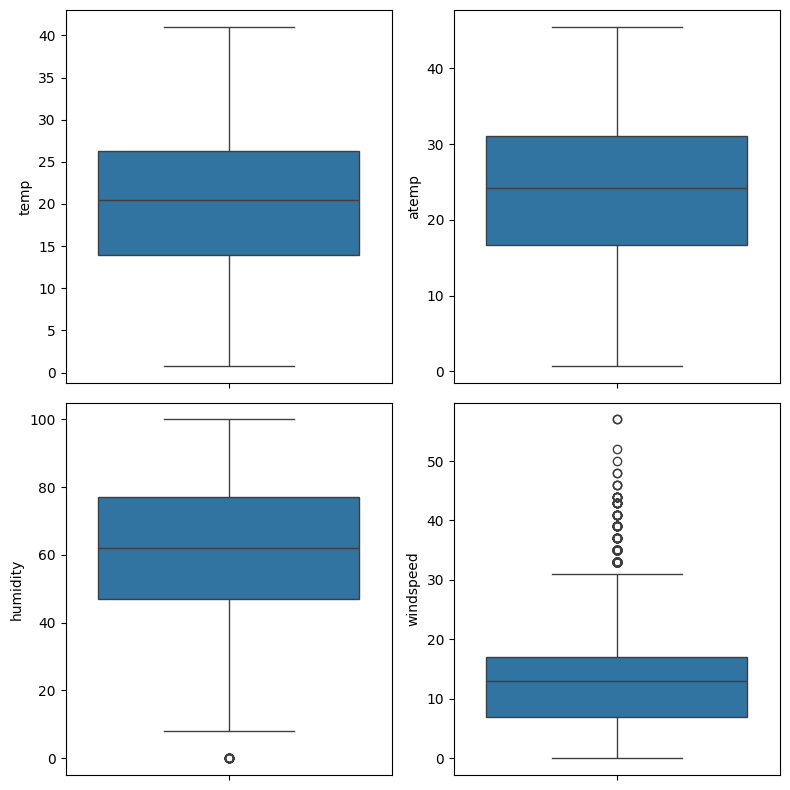

In [118]:
plt.figure(figsize=(8,8))
#수치형 컬럼들에 대해서 scaling 맞춰주기
#MinMaxScaler / Normalizer
#먼저 boxplot을 그려보고, 적절한 스케일러 선택하기
#서브플롯 이용해서 2x2 박스플롯들 시각화하기

numerical_data = ['temp', 'atemp', 'humidity', 'windspeed']
for i in range(len(numerical_data)):
    plt.subplot(2,2,i+1)
    sns.boxplot(train_x[numerical_data[i]])
    plt.tight_layout()

plt.show()

train & validation 데이터 스플릿

In [123]:
train_x['hour'] = train_x.index.hour

In [124]:
train_x

,season,weather,temp,atemp,humidity,windspeed,day_type,hour
datetime,,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,2,0
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,2,1
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,2,2
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,2,3
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,2,4
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,1,19
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,1,20
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,1,21


In [127]:
train_y

datetime
2011-01-01 00:00:00     16
2011-01-01 01:00:00     40
2011-01-01 02:00:00     32
2011-01-01 03:00:00     13
2011-01-01 04:00:00      1
                      ... 
2012-12-19 19:00:00    336
2012-12-19 20:00:00    241
2012-12-19 21:00:00    168
2012-12-19 22:00:00    129
2012-12-19 23:00:00     88
Name: count, Length: 10886, dtype: int64

In [129]:
train_x['count'] = train_y

In [130]:
train_x

,season,weather,temp,atemp,humidity,windspeed,day_type,hour,count
datetime,,,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,2,0,16
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,2,1,40
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,2,2,32
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,2,3,13
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,2,4,1
...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,1,19,336
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,1,20,241
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,1,21,168


In [131]:
train_x.to_csv('data/preprocessed_train.csv')

#### 2차 EDA
1. 시계열 인덱스에서 hour 이외에도 유의미한 값들 컬럼으로 추가 분리
2. 변수들 간 상관관계 분석하기
3. 수치형 변수들 스케일 조정
4. y값(count) 스케일 조정

할 것들
-변수들 간 상관관계 분석하기(상관 행렬 시각화)

시계열 데이터 시간 간격이 1H이기 때문에 hour보다 작은 단위인 min, sec은 분석 의미가 없음

In [39]:
train_data = pd.read_csv('data\preprocessed_train.csv', index_col='datetime')
train_data.index = pd.to_datetime(train_data.index)

In [35]:
dir(train_data.index[0])
train_data.index[0].dayofweek

5

In [40]:
train_data_y = train_data['count']
#train_data = train_data.drop(columns=['count'])
display(train_data)
display(train_data_y)

,season,weather,temp,atemp,humidity,windspeed,day_type,hour,count
datetime,,,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,2,0,16
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,2,1,40
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,2,2,32
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,2,3,13
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,2,4,1
...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,1,19,336
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,1,20,241
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,1,21,168


datetime
2011-01-01 00:00:00     16
2011-01-01 01:00:00     40
2011-01-01 02:00:00     32
2011-01-01 03:00:00     13
2011-01-01 04:00:00      1
                      ... 
2012-12-19 19:00:00    336
2012-12-19 20:00:00    241
2012-12-19 21:00:00    168
2012-12-19 22:00:00    129
2012-12-19 23:00:00     88
Name: count, Length: 10886, dtype: int64

In [41]:
train_data['year'] = train_data.index.year
train_data['month'] = train_data.index.month
train_data['day'] = train_data.index.day
train_data['day_of_week'] = train_data.index.dayofweek
display(train_data)


,season,weather,temp,atemp,humidity,windspeed,day_type,hour,count,year,month,day,day_of_week
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,2,0,16,2011,1,1,5
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,2,1,40,2011,1,1,5
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,2,2,32,2011,1,1,5
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,2,3,13,2011,1,1,5
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,2,4,1,2011,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,1,19,336,2012,12,19,2
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,1,20,241,2012,12,19,2
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,1,21,168,2012,12,19,2


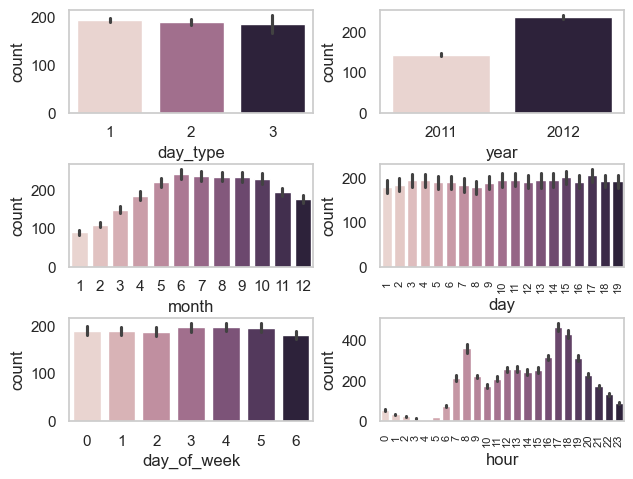

In [56]:
figure, axes = plt.subplots(nrows=3, ncols=2)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tight_layout()
sns.barplot(x='day_type', y='count', data=train_data, hue='day_type', ax=axes[0,0], legend=False)
sns.barplot(x='year', y='count', data=train_data, hue='year',ax=axes[0,1], legend=False)
sns.barplot(x='month', y='count', data=train_data, hue='month',ax=axes[1,0], legend=False)
sns.barplot(x='day', y='count', data=train_data, hue='day',ax=axes[1,1], legend=False)
sns.barplot(x='day_of_week', y='count', data=train_data, hue='day_of_week',ax=axes[2,0], legend=False)
sns.barplot(x='hour', y='count', data=train_data, hue='hour',ax=axes[2,1], legend=False)
axes[1,1].tick_params(axis='x', labelrotation=90, labelsize=8)
axes[2,1].tick_params(axis='x', labelrotation=90, labelsize=8)
plt.show()

<시각화 결과>\
day_type, day_of_week 큰 의미 없음\
year, month, hour 유의미함\
day 무의미

In [58]:
train_data = train_data.drop(columns=['day'])
train_data

,season,weather,temp,atemp,humidity,windspeed,day_type,hour,count,year,month,day_of_week
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,9.84,14.395,81,0.0000,2,0,16,2011,1,5
2011-01-01 01:00:00,1,1,9.02,13.635,80,0.0000,2,1,40,2011,1,5
2011-01-01 02:00:00,1,1,9.02,13.635,80,0.0000,2,2,32,2011,1,5
2011-01-01 03:00:00,1,1,9.84,14.395,75,0.0000,2,3,13,2011,1,5
2011-01-01 04:00:00,1,1,9.84,14.395,75,0.0000,2,4,1,2011,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,1,15.58,19.695,50,26.0027,1,19,336,2012,12,2
2012-12-19 20:00:00,4,1,14.76,17.425,57,15.0013,1,20,241,2012,12,2
2012-12-19 21:00:00,4,1,13.94,15.910,61,15.0013,1,21,168,2012,12,2


In [22]:
train_data['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

<Axes: >

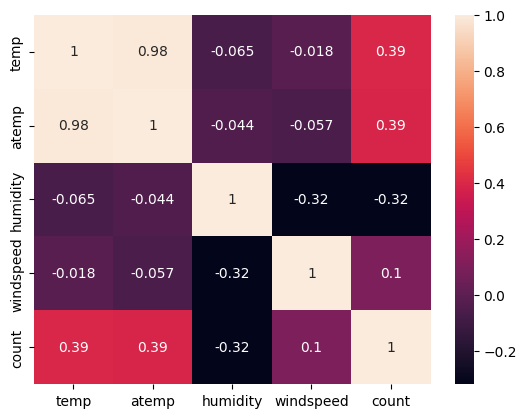

In [9]:
corrmat = train_data[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(corrmat, annot=True)